In [ ]:
import pandas as pd 
import numpy as np   
import seaborn as sns 
from datetime import datetime 
import plotly.express as px 
import plotly.figure_factory as ff 

import matplotlib.pyplot as plt 

### Clustering libraries 
from sklearn.cluster import KMeans   




In [ ]:
df = pd.read_csv('datasettt.csv', delimiter=';')

In [ ]:
df.head()

,Id,perusahaan,bulan,jumlah_transaksi,jumlah_uang,periode_bulan
0,12340,ACC FINANCE,10,437,63.329.544,januari-oktober
1,12341,ADIRA DINAMIKA FINANCE,10,62,4.644.100,januari-oktober
2,12342,BALAI DIKLAT KEUANGAN,10,95,1.318.999,januari-oktober
3,12343,BAPENDA,10,590,3.836.150,agustus-oktober
4,12344,BIMA FINANCE,2,298,21.414.755,februari


In [ ]:
df_baru= df.loc[:, ['Id', 'perusahaan']]

In [ ]:
df.columns

Index(['Id', 'perusahaan', 'bulan', 'jumlah_transaksi', 'jumlah_uang',
       'periode_bulan'],
      dtype='object')

In [ ]:
# out of total rows how many rows of them are Null 
(df.isnull().sum(), df.count()) 

(Id                  0
 perusahaan          0
 bulan               0
 jumlah_transaksi    0
 jumlah_uang         0
 periode_bulan       0
 dtype: int64, Id                  28
 perusahaan          28
 bulan               28
 jumlah_transaksi    28
 jumlah_uang         28
 periode_bulan       28
 dtype: int64)

In [ ]:
#fig,ax = plt.subplots(figsize=(6,4)) ## play with size 
#fig.suptitle("Correlation between features", fontsize=16)
#corrcoef = df.corr()
#mask = np.array(corrcoef)
#mask[np.tril_indices_from(mask)] = False
#sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
#plt.show();

In [ ]:
#plt.figure(figsize=(15,10))
#sns.heatmap(df.corr( ),annot=True)

In [ ]:
df = df.drop (['perusahaan', 'periode_bulan'], axis=1)
df.head()

,Id,bulan,jumlah_transaksi,jumlah_uang
0,12340,10,437,63.329.544
1,12341,10,62,4.644.100
2,12342,10,95,1.318.999
3,12343,10,590,3.836.150
4,12344,2,298,21.414.755


In [ ]:
def ubah_uang_menjadi_integer(uang):
  uang = uang.lower()
  uang = uang.strip()
  uang = uang.replace('rp', '')
  uang = uang.replace('.', '')
  uang = uang.replace(',', '')
  return int(uang)

In [ ]:
df['jumlah_uang'] = df['jumlah_uang'].apply(lambda x: ubah_uang_menjadi_integer(x))

In [ ]:
# Import library
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# Initialize the Object
scaler = MinMaxScaler()

# Fit and Transform The Data (minmax scaler 0-1)
scaled = scaler.fit_transform(df)
print(scaled)

[[0.00000000e+00 1.00000000e+00 6.52011365e-02 1.00000000e+00]
 [9.00195342e-06 1.00000000e+00 9.12217736e-03 7.30688230e-02]
 [1.80039068e-05 1.00000000e+00 1.40571258e-02 2.05491592e-02]
 [2.70058603e-05 1.00000000e+00 8.80813519e-02 6.03073272e-02]
 [3.60078137e-05 0.00000000e+00 4.44145357e-02 3.37959772e-01]
 [4.50097671e-05 6.25000000e-01 3.73859728e-03 6.91027216e-03]
 [5.40117205e-05 1.00000000e+00 2.54523703e-01 8.67576693e-01]
 [6.30136740e-05 1.00000000e+00 8.66905937e-01 6.40767820e-01]
 [7.20156274e-05 1.00000000e+00 1.00000000e+00 7.60314754e-01]
 [8.10175808e-05 1.00000000e+00 6.66517123e-01 4.22197885e-01]
 [9.99846967e-01 1.00000000e+00 2.40765665e-01 2.34436393e-01]
 [9.99855969e-01 1.00000000e+00 4.43995813e-01 4.82290165e-01]
 [9.99864971e-01 1.00000000e+00 9.15208614e-02 7.47361871e-01]
 [9.99873973e-01 3.75000000e-01 3.76850606e-02 3.96768084e-02]
 [9.99882975e-01 1.00000000e+00 1.57768805e-01 2.31355264e-01]
 [9.99891977e-01 1.00000000e+00 6.89546882e-01 5.215230

In [ ]:
#df = MinMaxScaler().fit_transform(df) 

#new_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
new_df = pd.DataFrame(scaled)
new_df

,0,1,2,3
0,0.000000,1.000,0.065201,1.000000
1,0.000009,1.000,0.009122,0.073069
2,0.000018,1.000,0.014057,0.020549
3,0.000027,1.000,0.088081,0.060307
4,0.000036,0.000,0.044415,0.337960
5,0.000045,0.625,0.003739,0.006910
6,0.000054,1.000,0.254524,0.867577
7,0.000063,1.000,0.866906,0.640768
8,0.000072,1.000,1.000000,0.760315
9,0.000081,1.000,0.666517,0.422198


In [ ]:
new_df.rename(columns = {0:'ID', 1:'Recency', 2:'Frequency', 3:'Monetary'}, inplace = True)

In [ ]:
new_df.head()

,ID,Recency,Frequency,Monetary
0,0.000000,1.0,0.065201,1.000000
1,0.000009,1.0,0.009122,0.073069
2,0.000018,1.0,0.014057,0.020549
3,0.000027,1.0,0.088081,0.060307
4,0.000036,0.0,0.044415,0.337960


In [ ]:
new_df.std()

ID           0.487893
Recency      0.326916
Frequency    0.314235
Monetary     0.317491
dtype: float64

In [ ]:
new_df.isnull().any().sum() 

0

In [ ]:
#new_df.to_excel("Data.xlsx", index=False)

Elbow Method to determine the number of clusters to be formed:


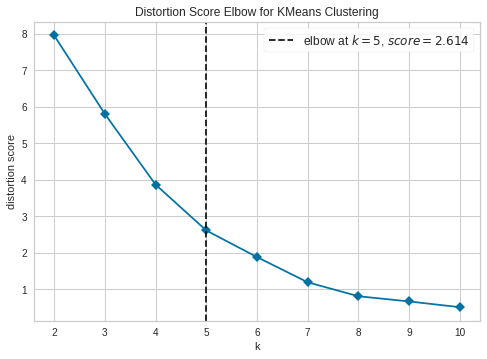

In [ ]:
from yellowbrick.cluster import KElbowVisualizer 

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10, timings=False)
Elbow_M.fit(new_df)
Elbow_M.show()   

In [ ]:
#from yellowbrick.cluster import SilhouetteVisualizer
 
#fig, ax = plt.subplots(2, 2, figsize=(13,6))
#for i in [2, 3, 4, 5]:
#    '''
#    Create KMeans instance for different number of clusters
#    '''
#    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#    q, mod = divmod(i, 2)
#    '''
#    Create SilhouetteVisualizer instance with KMeans instance
#    Fit the visualizer
#    '''
#    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#    visualizer.fit(new_df) 

In [ ]:
# Import the KElbowVisualizer method 
#from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
#model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
#visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette',  timings=False)

# Fit the data and visualize
#visualizer.fit(new_df)    
#visualizer.show()   

In [ ]:
#model = KMeans(number_clusterss, random_state=42)
#visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#visualizer.fit(new_df)        # Fit the data to the visualizer
#visualizer.show()                # Finalize and render the figure

In [ ]:
! pip install fuzzy-c-means 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
#number_clusterss = 5 

In [ ]:
from fcmeans import FCM 

fcm = FCM(n_clusters = 5)

#fcm = FCM(n_clusters=number_clusterss = 5)
fcm.fit(new_df.values)  

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(new_df.values) 

In [ ]:
new_df['Fuzzy_cluster'] = fcm_labels

In [ ]:
new_df.drop(['ID'], axis=1)

,Recency,Frequency,Monetary,Fuzzy_cluster
0,1.000,0.065201,1.000000,0
1,1.000,0.009122,0.073069,2
2,1.000,0.014057,0.020549,2
3,1.000,0.088081,0.060307,2
4,0.000,0.044415,0.337960,2
5,0.625,0.003739,0.006910,2
6,1.000,0.254524,0.867577,0
7,1.000,0.866906,0.640768,0
8,1.000,1.000000,0.760315,0
9,1.000,0.666517,0.422198,0


In [ ]:
data = pd.concat([new_df, df_baru],axis=1)

In [ ]:
data.drop(['ID'], axis=1)

,Recency,Frequency,Monetary,Fuzzy_cluster,Id,perusahaan
0,1.000,0.065201,1.000000,0,12340,ACC FINANCE
1,1.000,0.009122,0.073069,2,12341,ADIRA DINAMIKA FINANCE
2,1.000,0.014057,0.020549,2,12342,BALAI DIKLAT KEUANGAN
3,1.000,0.088081,0.060307,2,12343,BAPENDA
4,0.000,0.044415,0.337960,2,12344,BIMA FINANCE
5,0.625,0.003739,0.006910,2,12345,BJB
6,1.000,0.254524,0.867577,0,12346,BLBI ABIYOSO
7,1.000,0.866906,0.640768,0,12347,BPJS KESEHATAN
8,1.000,1.000000,0.760315,0,12348,BPJS KETENAGAKERJAAN
9,1.000,0.666517,0.422198,0,12349,BPJS KIS PBI


In [ ]:
#sns.relplot(x='Monetary', y='Frequency', hue='Fuzzy_cluster', 
#            size='Recency', data=new_df, palette = "Paired") 

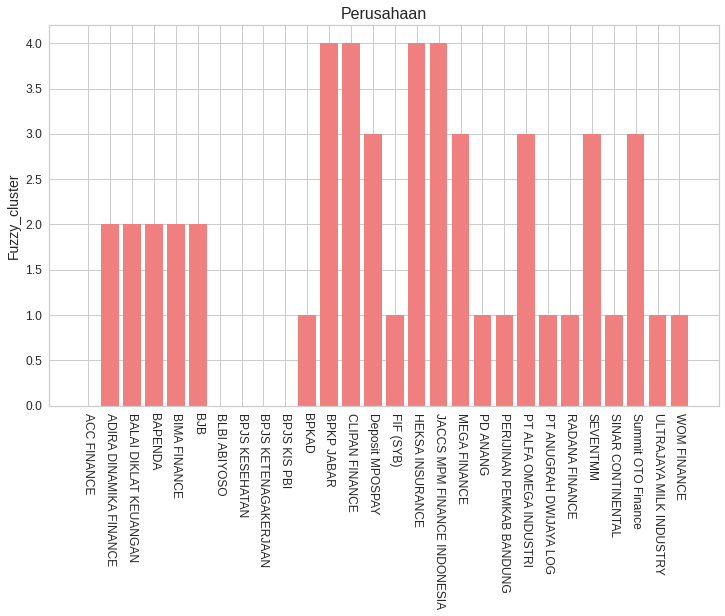

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline


prshn = data['perusahaan']
clstr = data['Fuzzy_cluster']

plt.figure(figsize=(12,7))
plt.bar(prshn, clstr, color='lightcoral')

plt.title('Perusahaan', size=16)
plt.ylabel('Fuzzy_cluster', size=14)
plt.xticks(size=12)
plt.xticks(rotation=270)
plt.yticks(size=12)

plt.show()

In [ ]:
new_df

,ID,Recency,Frequency,Monetary,Fuzzy_cluster
0,0.000000,1.000,0.065201,1.000000,0
1,0.000009,1.000,0.009122,0.073069,2
2,0.000018,1.000,0.014057,0.020549,2
3,0.000027,1.000,0.088081,0.060307,2
4,0.000036,0.000,0.044415,0.337960,2
5,0.000045,0.625,0.003739,0.006910,2
6,0.000054,1.000,0.254524,0.867577,0
7,0.000063,1.000,0.866906,0.640768,0
8,0.000072,1.000,1.000000,0.760315,0
9,0.000081,1.000,0.666517,0.422198,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


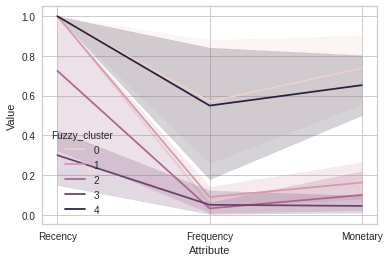

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(new_df, columns=['Recency', 'Frequency', 'Monetary'])
df_normalized['ID'] = df.index
df_normalized['Fuzzy_cluster'] = fcm_labels
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['Fuzzy_cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Fuzzy_cluster', data=df_nor_melt)

In [ ]:

### Clustering Metrics 
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score  
from sklearn.metrics import calinski_harabasz_score  

In [ ]:
#semakin tinggi score semakin baik(range -1 sampai 1)
print("Silhouette_score: {}".format(silhouette_score(new_df, fcm_labels)))

Silhouette_score: 0.74184941358801


In [ ]:
# semakin rendah score semakin baik (-0 sampai 1)
print("davies_bouldin_score: {}".format(davies_bouldin_score(new_df, fcm_labels)))

davies_bouldin_score: 0.34961427432996717


In [ ]:
#semakin tinggi score semakin baik
print("calinski_harabasz_score: {}".format(calinski_harabasz_score(new_df, fcm_labels)))

calinski_harabasz_score: 133.75300029410994
